1. Importing Necessary Libraries
I have  imported a number of Python libraries and modules here, each of which serves a specific purpose.


In [41]:
# Data Manipulation and Analysis:
import pandas as pd
import numpy as np
# Visualization:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
# Machine Learning Libraries:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# Evaluation Metrics:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Model Saving:
from joblib import dump


Data Loading:

We load the dataset using pd.read_csv(), which imports the data into a pandas DataFrame for easy manipulation.

pd.read_csv(): This is a Pandas function used to load data from a CSV file (Comma Separated Values) into a Pandas DataFrame, which is a tabular data structure. It allows me to manipulate and analyze the data with ease.

In [42]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('/Users/rehas./Documents/BIA /PROJECT/PRACTISE/star_classification_bia.csv')  
df.head()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


2. Data Exploration (EDA)

Getting a Statistical Summary of the Dataset:

In [43]:
# Get an overview of the dataset
print("First 5 rows of the dataset:")
print(df.head())  # Display first 5 rows

print("\nSummary of the dataset:")
print(df.describe())  # Get a statistical summary of numerical features




First 5 rows of the dataset:
         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354  

In [44]:
# Exploratory Data Analysis (EDA)
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
             obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230   

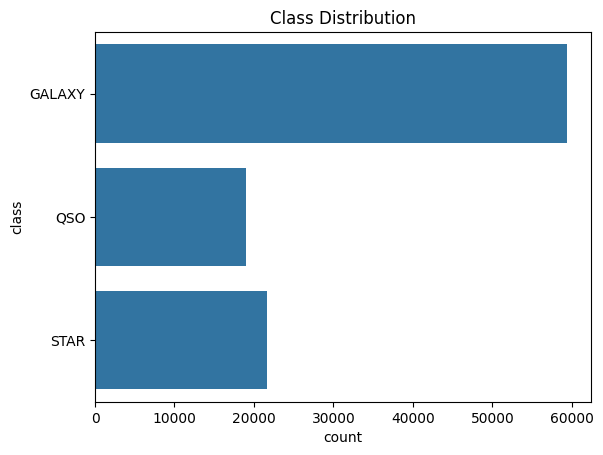

In [45]:
# Visualizing the distribution of object classes
sns.countplot(df['class'])
plt.title('Class Distribution')
plt.show()

The Next  code snippet is focused on preprocessing the dataset, including handling missing values, encoding categorical variables, creating new features, and binning numerical values. Here's a breakdown of what each part of the code does:

1. Identify Numerical and Categorical Columns:

2. Encoding Categorical Variables:

3. Creating a Synthetic 'Anomaly' Column:

4. Binning the redshift Values:

5. Summary of the Changes Made:

In [46]:
# Preprocessing: Handling missing values and scaling
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Encoding categorical variables if necessary
if 'class' in categorical_columns:
    df['class'] = df['class'].astype('category').cat.codes

# Define conditions to create a synthetic 'anomaly' column
threshold_fiber_ID = 500
alpha_delta_threshold = 2.0

# Creating the 'anomaly' column based on logical conditions
df['anomaly'] = np.where(
    (df['fiber_ID'] > threshold_fiber_ID) |
    ((df['alpha'] > df['alpha'].mean() + alpha_delta_threshold) | (df['alpha'] < df['alpha'].mean() - alpha_delta_threshold)) |
    ((df['delta'] > df['delta'].mean() + alpha_delta_threshold) | (df['delta'] < df['delta'].mean() - alpha_delta_threshold)),
    1,  # Anomalous
    0   # Normal
)

# Creating redshift bins for Case 2
def bin_redshift(value):
    if value < 0.5:
        return 'Low'
    elif 0.5 <= value < 1.5:
        return 'Medium'
    else:
        return 'High'

df['redshift_bin'] = df['redshift'].apply(bin_redshift)
df['redshift_bin'] = df['redshift_bin'].astype('category').cat.codes


1. Print Columns in the DataFrame:

In [47]:
print("Columns in the DataFrame:")
print(df.columns)


Columns in the DataFrame:
Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID', 'anomaly', 'redshift_bin'],
      dtype='object')


After this code, we are splitting the dataset into training and testing subsets for three different cases, each representing a different task (classification, photometric redshift binning, and anomaly detection). Let's break down what each part does:

Case 1: Object Classification

Case 2: Photometric Redshift Binning

Case 3: Satellite Anomaly Detection

Summary of Splits:

I have now created separate datasets for three different tasks, each of which will be handled as a separate machine learning problem:

Case 1 (Object Classification): Predicting the class of an object based on photometric bands (u, g, r, i, z).
Case 2 (Photometric Redshift Binning): Classifying the redshift values into bins (Low, Medium, High), again using the photometric bands (u, g, r, i, z).
Case 3 (Anomaly Detection): Predicting whether a satellite observation is anomalous based on the alpha, delta, and fiber_ID features.
Each of these tasks has its own set of training and test data, and you'll likely use different machine learning models for each case.

In [48]:
# Splitting data for each case
# Case 1: Object Classification
X_classification = df[['u', 'g', 'r', 'i', 'z']]
y_classification = df['class']

X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# Case 2: Photometric Redshift Binning
X_redshift = df[['u', 'g', 'r', 'i', 'z']]
y_redshift = df['redshift_bin']

X_train_redshift, X_test_redshift, y_train_redshift, y_test_redshift = train_test_split(
    X_redshift, y_redshift, test_size=0.2, random_state=42
)

# Case 3: Satellite Anomaly Detection
X_anomaly = df[['alpha', 'delta', 'fiber_ID']]
y_anomaly = df['anomaly']

X_train_anomaly, X_test_anomaly, y_train_anomaly, y_test_anomaly = train_test_split(
    X_anomaly, y_anomaly, test_size=0.2, random_state=42
)

Now scaling the features for each of the three cases (object classification, photometric redshift binning, and anomaly detection) using the StandardScaler from sklearn. Here's a breakdown of what each part does:

Why Scaling is Important:
Improves Model Performance: Many machine learning algorithms perform better when features are on a similar scale because they are often based on distance metrics (e.g., KNN, SVM) or gradient-based optimization (e.g., logistic regression, neural networks).
Prevents Dominance of Some Features: If one feature has a much larger range than others, it could dominate the learning process. Scaling ensures that all features contribute equally.

In [49]:
# Scaling the features
scaler = StandardScaler()
X_train_classification_scaled = scaler.fit_transform(X_train_classification)
X_test_classification_scaled = scaler.transform(X_test_classification)

X_train_redshift_scaled = scaler.fit_transform(X_train_redshift)
X_test_redshift_scaled = scaler.transform(X_test_redshift)

X_train_anomaly_scaled = scaler.fit_transform(X_train_anomaly)
X_test_anomaly_scaled = scaler.transform(X_test_anomaly)


Models Dictionary:

In [50]:
# Models to evaluate
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}


The function i've defined, evaluate_model, is designed to train a given model on the training data, make predictions on the test data, and compute various performance metrics. Here's a breakdown of how the function works and what each part does:

This will:

Train the Random Forest model on the scaled training data (X_train_classification_scaled, y_train_classification).
Make predictions on the scaled test data (X_test_classification_scaled).
Calculate the accuracy, precision, recall, and F1 score for the model on the classification task.
Print out the metrics in a readable format.

In [51]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }
    return metrics

In [52]:
# Evaluate models for Case 1
classification_results = {}
for name, model in models.items():
    metrics = evaluate_model(model, X_train_classification_scaled, y_train_classification, X_test_classification_scaled, y_test_classification)
    classification_results[name] = metrics

# Select best model for Case 1
best_model_classification = max(classification_results, key=lambda x: classification_results[x]['F1 Score'])
classification_model = models[best_model_classification]

# Train the best model
classification_model.fit(X_train_classification_scaled, y_train_classification)

# Save the best model
dump(classification_model, 'classification_model.joblib')

# Print results
print("\nCase 1: Object Classification")
for name, metrics in classification_results.items():
    print(f"{name}: {metrics}")
print(f"Best Model: {best_model_classification} with Accuracy {classification_results[best_model_classification]['Accuracy']}")


/opt/anaconda3/envs/reha/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.




Case 1: Object Classification
Random Forest: {'Accuracy': 0.8757, 'Precision': 0.8738712665057082, 'Recall': 0.8757, 'F1 Score': 0.8742827770216381}
Gradient Boosting: {'Accuracy': 0.82075, 'Precision': 0.8153074911383301, 'Recall': 0.82075, 'F1 Score': 0.8143097280611964}
AdaBoost: {'Accuracy': 0.7715, 'Precision': 0.7570728400060253, 'Recall': 0.7715, 'F1 Score': 0.756224261738393}
K-Nearest Neighbors: {'Accuracy': 0.84555, 'Precision': 0.8423830370884628, 'Recall': 0.84555, 'F1 Score': 0.8428245600910268}
SVM: {'Accuracy': 0.80505, 'Precision': 0.8027958002914498, 'Recall': 0.80505, 'F1 Score': 0.794192912827025}
Decision Tree: {'Accuracy': 0.81525, 'Precision': 0.8157776753242629, 'Recall': 0.81525, 'F1 Score': 0.8155018217088312}
Best Model: Random Forest with Accuracy 0.8757


In [37]:
# Evaluate models for Case 2: Photometric Redshift Binning
redshift_results = {}
for name, model in models.items():
    metrics = evaluate_model(model, X_train_redshift_scaled, y_train_redshift, X_test_redshift_scaled, y_test_redshift)
    redshift_results[name] = metrics

# Select the best model for Case 2
best_model_redshift = max(redshift_results, key=lambda x: redshift_results[x]['F1 Score'])
redshift_model = models[best_model_redshift]

# Train the best model
redshift_model.fit(X_train_redshift_scaled, y_train_redshift)

# Save the best model
dump(redshift_model, 'redshift_model.joblib')

# Print results for Case 2: Photometric Redshift Binning
print("\nCase 2: Photometric Redshift Binning")
for name, metrics in redshift_results.items():
    print(f"{name}: {metrics}")
print(f"Best Model: {best_model_redshift} with Accuracy {redshift_results[best_model_redshift]['Accuracy']}")

# Save the best model (already done above, no need to repeat this)
# dump(redshift_model, 'redshift_model.joblib')


/opt/anaconda3/envs/reha/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.




Case 2: Photometric Redshift Binning
Random Forest: {'Accuracy': 0.84625, 'Precision': 0.847092515956194, 'Recall': 0.84625, 'F1 Score': 0.8463758165519719}
Gradient Boosting: {'Accuracy': 0.8052, 'Precision': 0.8094733835119927, 'Recall': 0.8052, 'F1 Score': 0.8068642415867225}
AdaBoost: {'Accuracy': 0.75985, 'Precision': 0.7674617626160418, 'Recall': 0.75985, 'F1 Score': 0.7631734713165838}
K-Nearest Neighbors: {'Accuracy': 0.8111, 'Precision': 0.8148889041147506, 'Recall': 0.8111, 'F1 Score': 0.8128097695515053}
SVM: {'Accuracy': 0.7566, 'Precision': 0.7769960351802083, 'Recall': 0.7566, 'F1 Score': 0.7643431854967992}
Decision Tree: {'Accuracy': 0.7927, 'Precision': 0.794191580990226, 'Recall': 0.7927, 'F1 Score': 0.7934029537928824}
Best Model: Random Forest with Accuracy 0.84625


In [38]:
# Evaluate models for Case 3: Satellite Anomaly Detection
anomaly_results = {}
for name, model in models.items():
    metrics = evaluate_model(model, X_train_anomaly_scaled, y_train_anomaly, X_test_anomaly_scaled, y_test_anomaly)
    anomaly_results[name] = metrics

# Select the best model for Case 3
best_model_anomaly = max(anomaly_results, key=lambda x: anomaly_results[x]['F1 Score'])
anomaly_model = models[best_model_anomaly]

# Train the best model
anomaly_model.fit(X_train_anomaly_scaled, y_train_anomaly)

# Save the best model
dump(anomaly_model, 'anomaly_model.joblib')

# Print results for Case 3: Satellite Anomaly Detection
print("\nCase 3: Satellite Anomaly Detection")
for name, metrics in anomaly_results.items():
    print(f"{name}: {metrics}")
print(f"Best Model: {best_model_anomaly} with Accuracy {anomaly_results[best_model_anomaly]['Accuracy']}")


/opt/anaconda3/envs/reha/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.




Case 3: Satellite Anomaly Detection
Random Forest: {'Accuracy': 0.9999, 'Precision': 0.9999000100040017, 'Recall': 0.9999, 'F1 Score': 0.9998944469455701}
Gradient Boosting: {'Accuracy': 0.9999, 'Precision': 0.9999000100040017, 'Recall': 0.9999, 'F1 Score': 0.9998944469455701}
AdaBoost: {'Accuracy': 0.99995, 'Precision': 0.9999500025011255, 'Recall': 0.99995, 'F1 Score': 0.9999486848358234}
K-Nearest Neighbors: {'Accuracy': 0.9996, 'Precision': 0.9996001600160016, 'Recall': 0.9996, 'F1 Score': 0.9994667066786702}
SVM: {'Accuracy': 0.9995, 'Precision': 0.99900025, 'Recall': 0.9995, 'F1 Score': 0.999250062515629}
Decision Tree: {'Accuracy': 0.99995, 'Precision': 0.9999545454545454, 'Recall': 0.99995, 'F1 Score': 0.9999511898508621}
Best Model: Decision Tree with Accuracy 0.99995


/opt/anaconda3/envs/reha/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [39]:
# Visualization for all metrics using 3D Hover Donut Charts
classification_metrics = pd.DataFrame(classification_results).T
redshift_metrics = pd.DataFrame(redshift_results).T
anomaly_metrics = pd.DataFrame(anomaly_results).T

# 3D Hover Donut Chart for Classification Metrics
fig1 = go.Figure(data=[
    go.Pie(
        labels=classification_metrics.index,
        values=classification_metrics['F1 Score'],
        hole=0.4,
        hoverinfo="label+percent+value",
        textinfo="label+value",
        marker=dict(colors=plt.cm.viridis(np.linspace(0, 1, len(classification_metrics.index))))
    )
])
fig1.update_layout(title="Classification Metrics (3D Hover Donut)")
fig1.show()

# 3D Hover Donut Chart for Redshift Metrics
fig2 = go.Figure(data=[
    go.Pie(
        labels=redshift_metrics.index,
        values=redshift_metrics['F1 Score'],
        hole=0.4,
        hoverinfo="label+percent+value",
        textinfo="label+value",
        marker=dict(colors=plt.cm.viridis(np.linspace(0, 1, len(redshift_metrics.index))))
    )
])
fig2.update_layout(title="Redshift Metrics (3D Hover Donut)")
fig2.show()

# 3D Hover Donut Chart for Anomaly Detection Metrics
fig3 = go.Figure(data=[
    go.Pie(
        labels=anomaly_metrics.index,
        values=anomaly_metrics['F1 Score'],
        hole=0.4,
        hoverinfo="label+percent+value",
        textinfo="label+value",
        marker=dict(colors=plt.cm.viridis(np.linspace(0, 1, len(anomaly_metrics.index))))
    )
])
fig3.update_layout(title="Anomaly Detection Metrics (3D Hover Donut)")
fig3.show()

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

# Example for Object Classification
pipeline_classification = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])

# Train the pipeline
pipeline_classification.fit(X_train_classification, y_train_classification)

# Save the entire pipeline
joblib.dump(pipeline_classification, 'classification_model.joblib')

# Evaluate and store metrics
y_pred_classification = pipeline_classification.predict(X_test_classification)
classification_accuracy = accuracy_score(y_test_classification, y_pred_classification)
classification_f1 = f1_score(y_test_classification, y_pred_classification, average='weighted')
print(f"Classification Accuracy: {classification_accuracy}, F1 Score: {classification_f1}")


Classification Accuracy: 0.87515, F1 Score: 0.8737621633231207


Model Usage:
- Once the models are saved, they can be loaded and used for predictions on new data using `joblib.load()`.


Final Notes:
 - This pipeline allows for a clear and structured way to train machine learning models on different tasks using the same dataset.
 - The use of hover-enabled visualizations enhances the user experience by providing additional context for the evaluation metrics.
 - The best models for each task can be deployed for future predictions or further analysis.

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib


pipeline_redshift = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])

# Train the pipeline
pipeline_redshift.fit(X_train_redshift, y_train_redshift)

# Save the entire pipeline
joblib.dump(pipeline_redshift, 'redshift_model.joblib')

# Evaluate and store metrics
y_pred_redshift = pipeline_redshift.predict(X_test_redshift)
redshift_accuracy = accuracy_score(y_test_redshift, y_pred_redshift)
redshift_f1 = f1_score(y_test_redshift, y_pred_redshift, average='weighted')
print(f"Redshift Accuracy: {redshift_accuracy}, F1 Score: {redshift_f1}")


Redshift Accuracy: 0.84775, F1 Score: 0.8476702646081853


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib


pipeline_anomaly = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])

# Train the pipeline
pipeline_anomaly.fit(X_train_anomaly, y_train_anomaly)

# Save the entire pipeline
joblib.dump(pipeline_anomaly, 'anomaly_model.joblib')

# Evaluate and store metrics
y_pred_anomaly = pipeline_anomaly.predict(X_test_anomaly)
anomaly_accuracy = accuracy_score(y_test_anomaly, y_pred_anomaly)
anomaly_f1 = f1_score(y_test_anomaly, y_pred_anomaly, average='weighted')
print(f"Anomaly Accuracy: {anomaly_accuracy}, F1 Score: {anomaly_f1}")


Anomaly Accuracy: 0.9999, F1 Score: 0.9998944469455701


This solution keeps the visualization 2D  

 Visualization of Evaluation Metrics:
 - The evaluation metrics (Accuracy and F1 Score) for all cases are displayed using an interactive 2D bar chart from Plotly.
 - Hover functionality is included to display detailed information about each metric when hovering over the bars.
- The grouped bar chart allows for easy comparison of Accuracy and F1 Score across the three cases.


In [24]:
import plotly.graph_objects as go

# Define the evaluation metrics
metrics = {
    'Case 1: Classification': {'Accuracy': classification_accuracy, 'F1 Score': classification_f1},
    'Case 2: Redshift Binning': {'Accuracy': redshift_accuracy, 'F1 Score': redshift_f1},
    'Case 3: Anomaly Detection': {'Accuracy': anomaly_accuracy, 'F1 Score': anomaly_f1},
}

# Extract the labels, accuracy, and F1 scores
labels, acc, f1 = zip(*[(k, v['Accuracy'], v['F1 Score']) for k, v in metrics.items()])

# Create a bar chart
fig = go.Figure()

# Add Accuracy bars
fig.add_trace(go.Bar(
    x=labels,
    y=acc,
    name='Accuracy',
    marker_color='skyblue',
    hovertemplate=(
        '<b>Case:</b> %{x}<br>' +
        '<b>Metric:</b> Accuracy<br>' +
        '<b>Score:</b> %{y}<br>'  # Display the Accuracy value
    )
))

# Add F1 Score bars
fig.add_trace(go.Bar(
    x=labels,
    y=f1,
    name='F1 Score',
    marker_color='orange',
    hovertemplate=(
        '<b>Case:</b> %{x}<br>' +
        '<b>Metric:</b> F1 Score<br>' +
        '<b>Score:</b> %{y}<br>'  # Display the F1 Score value
    )
))

# Customize layout
fig.update_layout(
    title='Evaluation Metrics for All Cases',
    barmode='group',  # Group bars next to each other
    xaxis_title='Case',
    yaxis_title='Score',
    legend_title='Metrics',
    margin=dict(l=40, r=40, b=40, t=40),  # Adjust margins for better fit
    template='plotly_white'  # Clean background
)

# Show plot
fig.show()
